# 0.4 Train SVM model

In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import numpy as np
import pandas as pd
import os
import string
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import src.features.build_features as bf

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
dataset = pd.read_csv("data/features_resolut_200_new_seg_1.csv")

In [6]:
X = dataset.iloc[:, 2:]
X.head(15)

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,8255.5,4631.0,3,515.102593,75,128,0.585938,1.162861,32.139868,11.055200,13.004900,7.143275,21.374102,25.050269,14.130791,608.716383,0.955533,2.763928
1,9755.0,5596.0,2,457.587873,111,111,1.000000,1.263045,21.464548,14.568075,17.011750,8.623075,25.321532,29.574539,15.310576,534.379805,0.962632,3.000271
2,7199.5,3142.0,3,216.994947,63,65,0.969231,0.568789,6.540289,10.934300,12.713125,6.926350,23.012513,26.634183,14.777568,488.828590,0.957606,2.395094
3,8916.5,4455.0,3,268.793937,68,92,0.739130,0.701621,8.102975,13.261675,15.467050,7.692150,24.513634,28.490521,14.504685,409.607936,0.969524,2.628570
4,11932.5,7307.0,2,341.504615,103,103,1.000000,0.889084,9.773761,16.791500,19.541600,10.771450,25.461550,29.531543,16.773968,477.301618,0.971588,3.598227
5,9690.0,5165.0,2,275.965510,76,86,0.883721,0.674510,7.859336,14.839550,17.609325,8.772150,26.002006,30.745163,15.614563,363.836563,0.973569,2.778282
6,12882.5,12882.5,1,574.256920,172,155,1.109677,2.069474,25.598371,18.920400,22.083800,8.354050,27.884396,32.202062,13.728103,376.410593,0.977817,3.820916
7,9795.0,6693.0,2,674.984843,107,150,0.713333,1.638591,46.513991,12.386850,14.577350,8.072575,21.590478,25.318638,14.524228,697.582812,0.955448,3.045495
8,11402.0,5453.0,3,317.906635,89,87,1.022989,0.679091,8.863763,16.761025,20.167275,9.808975,26.240992,31.574532,15.806765,530.442124,0.966073,3.336639
9,6543.0,6543.0,1,565.872143,107,180,0.594444,2.943604,48.939521,9.328825,10.487200,4.302375,21.095566,23.455026,10.204354,394.499773,0.965085,2.181142


In [7]:
X.drop(columns=['correlation'], inplace=True)

In [8]:
y = dataset.iloc[:,1]
y.head(5)

0    9
1    9
2    9
3    9
4    9
Name: label, dtype: int64

## Cross validational split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 140) #r state 140

In [11]:
from sklearn import preprocessing

In [12]:
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test - X_train.mean()) / X_train.std()
#scaler = preprocessing.MinMaxScaler()
#X_train_std = scaler.fit_transform(X_train)
#X_test_std = scaler.transform(X_test)

In [13]:
X_train_std

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast
2064,0.629558,0.759334,0.312756,-0.227683,0.638194,0.280325,-0.105533,-0.305202,-0.491101,1.057153,0.991831,0.744784,1.392504,1.287010,0.771023,-0.486487
435,-0.796309,-0.964664,0.312756,-1.157052,-1.501275,-0.805062,-0.605714,-0.524731,-0.597390,-0.812391,-0.756984,-0.483169,-0.602769,-0.435059,0.024331,-0.815478
2422,0.523354,0.780066,-0.688532,-0.214379,0.718929,0.497403,-0.160839,-0.228240,-0.476783,0.748035,0.740066,0.533828,0.983521,0.997685,0.424915,-0.542836
3144,-1.073210,-1.133679,0.312756,-1.219438,-0.754479,-2.048324,2.006785,-0.598688,-0.573917,-1.113087,-1.169211,-1.028869,-1.082549,-1.278112,-1.187040,-0.832552
4584,2.164315,2.351798,0.312756,0.152346,0.840031,0.556605,-0.142599,-0.455717,-0.513028,2.314186,2.073288,1.433519,1.377171,1.060966,1.717045,0.345245
2688,-0.579812,-0.769296,0.312756,-1.089430,-0.633377,-1.594434,0.738956,-0.582742,-0.602355,-0.518453,-0.579834,-0.550703,-0.139515,-0.288874,-0.435383,-0.867087
315,-0.337260,-0.126032,0.312756,0.219443,1.142786,0.536871,-0.036988,0.253578,-0.114380,-0.199008,-0.153259,-0.119400,0.230453,0.346486,0.197031,-0.361993
2781,0.325901,0.582120,-0.688532,0.738185,1.102418,0.359262,0.023169,-0.132505,-0.086186,0.362505,0.368004,0.958612,0.721860,0.737720,1.995721,0.493699
3689,0.694635,-0.253935,0.312756,-1.004511,-0.956316,-0.982671,-0.196625,-0.667504,-0.652217,0.900644,0.894110,0.380449,1.035591,1.018782,0.149128,-0.621410
4736,0.821285,1.078740,-0.688532,-0.149758,-0.532459,0.714480,-0.619730,-0.461896,-0.488659,1.351021,0.778053,0.589768,1.782729,0.821086,1.202001,-0.455600


## Applying SVM classifier model

In [14]:
from sklearn import svm

In [15]:
clf = svm.SVC(kernel='rbf', C=2900, decision_function_shape='ovo', gamma=0.01)#700, 0.01, no 'corr'
clf.fit(X_train_std, y_train)

SVC(C=2900, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_pred = clf.predict(X_test_std)

In [17]:
from sklearn import metrics

In [18]:
metrics.f1_score(y_test, y_pred, average='micro')

0.8231578947368422

In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.86      0.78      0.82        69
           2       0.83      0.91      0.87        47
           3       0.80      0.97      0.88        33
           4       0.95      0.93      0.94        57
           5       0.82      0.78      0.80        18
           6       0.78      0.78      0.78        23
           7       0.88      0.84      0.86        25
           8       0.88      0.86      0.87        44
           9       0.91      0.67      0.77        30
          10       0.73      0.80      0.77        61
          11       0.57      0.50      0.53        26

   micro avg       0.82      0.82      0.82       475
   macro avg       0.82      0.81      0.81       475
weighted avg       0.83      0.82      0.82       475



## GridSearch

In [93]:
def gridSearch(DataSet, LabelSet):
    #define logspace/interval from which c and gamma valuest are computed and saved to a dictionary to be passed as a parameter
    #c from 1e-2 to 1e5
    C_range = np.logspace(-1, 5, 6)
    #gamma from 1e-5 to 1e3
    gamma_range = np.logspace(-1, 5, 6)
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=1)
    grid.fit(DataSet, LabelSet)
    
    return grid

In [94]:
svm_grid = gridSearch(X_train_std, y_train)

In [95]:
y_pred_svm_grid = svm_grid.predict(X_test_std)

In [96]:
metrics.f1_score(y_test, y_pred_svm_grid, average='micro')

0.7835558678847505

In [97]:
svm_grid.best_params_

{'C': 25.118864315095795, 'gamma': 0.1}

## Save model

In [229]:
import pickle

In [230]:
# save the classifier
with open('/Users/anacriel/plant_seed_classification/models/svm_0_85.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

## Checking test images

In [20]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [21]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import cv2
import mahotas as mt
from matplotlib import pyplot as plt
from src.data.make_dataset import create_dataset_added_features

In [22]:
data_dir = '../data/raw/'
test_image_dir = os.path.join(data_dir, 'test')

In [23]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [24]:
images, titles = vs.read_images(test_image_dir, data_type='test')

794


In [25]:
features_of_img = create_dataset_added_features(images, titles, kind='title')

/Users/anacriel/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:132: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [26]:
features_of_img.drop(columns='title', inplace=True)
features_of_img.drop(columns=['correlation'], inplace=True)

In [27]:
features_of_img.head(100)

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,entropy
0,10556.0,10556.0,1,914.607206,189,176,1.073864,3.151194,79.244633,18.183600,21.456075,7.647125,29.797850,35.188310,13.221728,598.162592,3.156321
0,1668.5,996.0,2,484.333041,67,159,0.421384,6.384777,140.592445,3.396425,3.579725,1.977050,14.643914,15.309934,8.749556,550.181273,0.863087
0,10196.0,10196.0,1,534.901583,185,95,1.947368,1.723715,28.061956,17.958225,21.669900,7.943200,30.433578,36.750677,14.117373,370.906950,3.146458
0,6145.5,6145.5,1,521.026474,137,188,0.728723,4.191034,44.173556,11.043400,13.050375,5.638300,25.545052,30.230776,13.758923,334.619635,2.033480
0,17063.5,17063.5,1,841.879285,188,191,0.984293,2.104375,41.536656,24.731575,30.501775,13.909500,29.040179,35.739998,17.662892,637.685572,4.488802
0,1684.0,1684.0,1,512.014280,200,103,1.941748,12.232779,155.676142,3.702150,3.927425,2.284600,15.251398,16.170113,9.545214,397.728542,0.849919
0,15248.5,15248.5,1,515.345233,193,112,1.723214,1.417582,17.416842,26.165650,30.368225,10.397700,33.250669,38.460003,14.318433,303.565265,3.947636
0,6736.5,5153.5,2,1052.531085,141,191,0.738220,3.997773,164.450632,13.051475,14.581625,6.043375,27.816442,31.074204,13.773227,901.963369,2.532016
0,7667.5,7667.5,1,668.482318,157,188,0.835106,3.849495,58.280875,14.367675,16.406875,4.118200,29.051192,33.196702,9.664581,424.628224,2.452259
0,452.5,452.5,1,278.232536,105,78,1.346154,18.099448,171.079214,1.135350,1.152225,0.658125,8.715287,8.818560,5.093289,211.439563,0.302504


In [28]:
features_of_img = (features_of_img - X_train.mean()) / X_train.std()
#features_of_img = scaler.transform(features_of_img)

In [29]:
y_test_pred = clf.predict(features_of_img)

In [30]:
y_test_pred[0]

6

In [31]:
len(titles)

794

In [32]:
len(features_of_img)

794

In [33]:
cols = {'file':titles, 'species':y_test_pred}

In [34]:
submission_df = pd.DataFrame(data=cols)

In [35]:
submission_df.iloc[520]

file       e721c6ac8.png
species               10
Name: 520, dtype: object

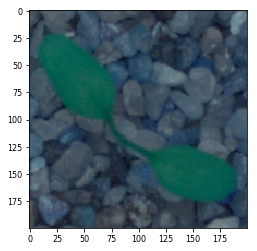

In [36]:
plt.imshow(images[791])

In [37]:
features_of_img

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,entropy
0,0.688793,0.945918,-0.688532,1.033569,1.06205,0.793417,-0.154909,-0.156889,-0.055339,0.656201,0.711950,0.517897,0.578300,0.704425,0.235860,0.438478,0.652931
0,-1.387966,-1.293558,0.312756,-0.382700,-1.40036,0.457934,-0.853197,0.523193,0.460422,-1.388708,-1.383153,-1.169717,-1.611752,-1.637261,-1.093175,0.239611,-1.355149
0,0.604672,0.861586,-0.688532,-0.216251,0.981316,-0.805062,0.779921,-0.457114,-0.485640,0.625034,0.737010,0.606019,0.670175,0.888473,0.502026,-0.503421,0.644294
0,-0.341817,-0.087263,-0.688532,-0.261921,0.0125003,1.03023,-0.524280,0.061809,-0.350187,-0.331213,-0.273196,-0.080000,-0.036316,0.120424,0.395502,-0.653820,-0.330290
0,2.209414,2.470331,-0.688532,0.794181,1.04187,1.08943,-0.250768,-0.377054,-0.372356,1.561716,1.772103,2.381799,0.468801,0.769414,1.555679,0.602287,1.819724
0,-1.384344,-1.132391,-0.688532,-0.291585,1.28407,-0.647187,0.773905,1.753135,0.587233,-1.346429,-1.342402,-1.078179,-1.523958,-1.535932,-0.856722,-0.392255,-1.366679
0,1.785299,2.045159,-0.688532,-0.280621,1.14279,-0.469579,0.540030,-0.521499,-0.575135,1.760033,1.756451,1.336564,1.077302,1.089833,0.561777,-0.782530,1.345849
0,-0.203717,-0.319644,0.312756,1.487552,0.0932349,1.08943,-0.514117,0.021162,0.661001,-0.053518,-0.093734,0.040564,0.291946,0.219781,0.399753,1.697630,0.106255
0,0.013832,0.269273,-0.688532,0.223437,0.416174,1.03023,-0.410428,-0.010023,-0.231585,0.128499,0.120185,-0.532435,0.470393,0.469812,-0.821249,-0.280764,0.036416
0,-1.672111,-1.420876,-0.688532,-1.061089,-0.633377,-1.14055,0.136498,2.987003,0.716729,-1.701391,-1.667655,-1.562275,-2.468558,-2.401950,-2.179739,-1.164360,-1.846026


In [38]:
submission_df

,file,species
0,1b490196c.png,6
1,85431c075.png,10
2,506347cfe.png,2
3,7f46a71db.png,0
4,668c1007c.png,3
5,71f5323c5.png,11
6,1f3f44563.png,5
7,beebe5f4e.png,2
8,780defa2e.png,8
9,df521c0c0.png,10


In [39]:
submission_df.to_csv("data/10th_submission.csv")

In [40]:
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }

In [41]:
mapping_rev = {v : k for k, v in mapping.items()}

In [42]:
mapping_rev

{0: 'Sugar beet',
 1: 'Fat Hen',
 2: 'Scentless Mayweed',
 3: 'Charlock',
 4: 'Small-flowered Cranesbill',
 5: 'Maize',
 6: 'Shepherds Purse',
 7: 'Common wheat',
 8: 'Common Chickweed',
 9: 'Cleavers',
 10: 'Loose Silky-bent',
 11: 'Black-grass'}

In [43]:
submission_df.species.replace(mapping_rev, inplace=True); submission_df

,file,species
0,1b490196c.png,Shepherds Purse
1,85431c075.png,Loose Silky-bent
2,506347cfe.png,Scentless Mayweed
3,7f46a71db.png,Sugar beet
4,668c1007c.png,Charlock
5,71f5323c5.png,Black-grass
6,1f3f44563.png,Maize
7,beebe5f4e.png,Scentless Mayweed
8,780defa2e.png,Common Chickweed
9,df521c0c0.png,Loose Silky-bent


In [44]:
submission_df.to_csv("/Users/anacriel/submission.csv", index=False)